<a href="https://colab.research.google.com/github/kylemath/DeepEEG/blob/master/notebooks/DeepEEG_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DeepEEG


In [3]:
!git clone https://github.com/kylemath/DeepEEG
!chmod +x ./DeepEEG/install.sh
%cd DeepEEG
!./install.sh
from utils import *
%matplotlib inline
%cd ..

fatal: destination path 'DeepEEG' already exists and is not an empty directory.
/content/DeepEEG
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.0.3)


Using TensorFlow backend.


/content


#Simulate Data

In [4]:
raw,event_id = SimulateRaw(amp1 = 50, amp2 = 5, freq = 2., batch = 3)

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Provided parameters will provide approximately 1022 events
Setting up raw simulation: 1 position, "cos2" interpolation
Blinks simulated 

#Run Preprocessing

In [5]:
epochs = PreProcess(raw, event_id,filter_data=False)                


Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2043 events found
Event IDs: [1 2]
Remaining Trials: 2040


#Plot Features:


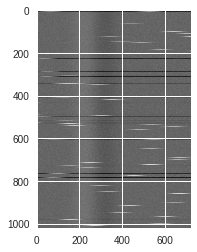

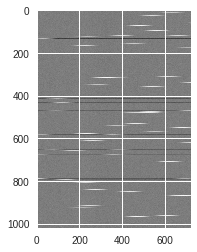

In [6]:
pick = 33
for event in event_id.keys():
  fig = plt.imshow(epochs[event]._data[:,pick,:])
  plt.show()

#Run FeatureEngineer

In [11]:
feats = FeatureEngineer(epochs, model_type = 'NN')

Constructing Time Domain Features
Normalizing X
Combined X Shape: (2040, 601, 59)
Combined Y Shape: (2040,)
Y Example (should be 1s & 0s): [0 0 0 0 0 0 0 0 0 0]
X Range: -23.982725:18.355375
Input Shape: (601, 59)
x_train shape: (1224, 601, 59)
1224 train samples
408 test samples
408 validation samples
Class Weights: [1.01492537 0.98550725]


# Run CreateModel

In [12]:
model, encoder = CreateModel(feats, units=[32,32,32,32])

Creating NN Model
Input shape: (601, 59)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 35459)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1134720   
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_6 (Batch (None,

# TrainTestVal

Training Model:
Train on 1224 samples, validate on 408 samples
Epoch 1/20
1224/1224 [==============================] - 11s 9ms/step - loss: 0.5964 - acc: 0.6757 - val_loss: 0.6970 - val_acc: 0.5417
Epoch 2/20
1224/1224 [==============================] - 9s 8ms/step - loss: 0.6146 - acc: 0.6748 - val_loss: 0.4832 - val_acc: 0.9485
Epoch 3/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.5713 - acc: 0.7190 - val_loss: 0.4329 - val_acc: 0.9387
Epoch 4/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.5302 - acc: 0.7149 - val_loss: 0.4349 - val_acc: 0.9436
Epoch 5/20
1224/1224 [==============================] - 9s 8ms/step - loss: 0.5594 - acc: 0.7059 - val_loss: 0.4874 - val_acc: 0.9461
Epoch 6/20
1224/1224 [==============================] - 9s 8ms/step - loss: 0.4977 - acc: 0.7500 - val_loss: 0.4371 - val_acc: 0.9485
Epoch 7/20
1224/1224 [==============================] - 10s 8ms/step - loss: 0.5463 - acc: 0.7239 - val_loss: 0.5153 - val_acc: 0.

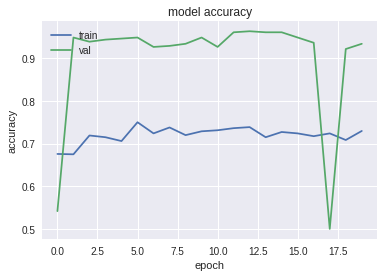

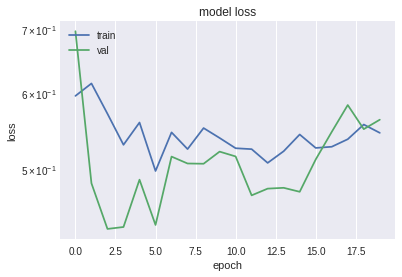

408/408 [==============================] - 1s 2ms/step
['loss', 'acc']
Test loss: 0.5603027852142558
Test accuracy: 0.9215686274509803


(<keras.engine.sequential.Sequential at 0x7f78f6aa6908>,
 {'acc': 0.9215686274509803, 'score': 0.5603027852142558})

In [13]:
TrainTestVal(model, feats)